<a href="https://colab.research.google.com/github/markitosanches/machine/blob/master/RealState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
!wget https://github.com/markitosanches/machine/blob/master/housepricedata.csv

--2019-12-15 00:19:27--  https://github.com/markitosanches/machine/blob/master/housepricedata.csv
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘housepricedata.csv.1’

housepricedata.csv.     [     <=>            ] 681.04K   694KB/s    in 1.0s    

2019-12-15 00:19:29 (694 KB/s) - ‘housepricedata.csv.1’ saved [697390]



In [0]:
data = pd.read_csv("housepricedata.csv");

In [0]:
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [0]:
dataset = data.values

In [0]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
dataset.shape

(1460, 11)

In [0]:
# columns 1 - 10
X = dataset[:,0:10]

In [0]:
X.shape

(1460, 10)

In [0]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [0]:
Y = dataset[:,10]

In [0]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [0]:
Y.shape

In [0]:
#scaling 
from sklearn import preprocessing

In [0]:
#all values between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [0]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Train and test set (30%)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
#validation test (50% of test set)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense



In [0]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(10,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

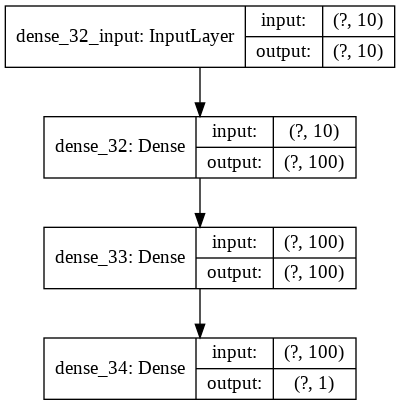

In [0]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/50
1022/1022 [==============================] - 1s 529us/step - loss: 0.2209 - acc: 0.6389 - val_loss: 0.1825 - val_acc: 0.8493
Epoch 2/50
1022/1022 [==============================] - 0s 58us/step - loss: 0.1582 - acc: 0.8278 - val_loss: 0.1398 - val_acc: 0.8219
Epoch 3/50
1022/1022 [==============================] - 0s 55us/step - loss: 0.1215 - acc: 0.8620 - val_loss: 0.1134 - val_acc: 0.8630
Epoch 4/50
1022/1022 [==============================] - 0s 57us/step - loss: 0.1059 - acc: 0.8757 - val_loss: 0.1077 - val_acc: 0.8721
Epoch 5/50
1022/1022 [==============================] - 0s 60us/step - loss: 0.0977 - acc: 0.8777 - val_loss: 0.1042 - val_acc: 0.8630
Epoch 6/50
1022/1022 [==============================] - 0s 55us/step - loss: 0.0898 - acc: 0.8914 - val_loss: 0.0999 - val_acc: 0.8676
Epoch 7/50
1022/1022 [==============================] - 0s 54us/step - loss: 0.0886 - acc: 0.8933 - val_loss: 0.1035 - val_acc: 0.8539
Epoch 8

In [0]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 70us/step


[0.07845113324384166, 0.8858447504914515]

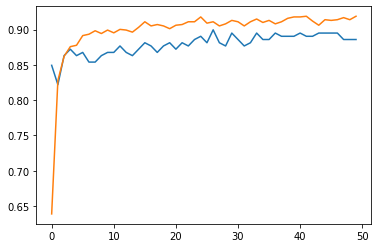

In [0]:
hist.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])

In [0]:
#run prediction at local
prediction = model.predict(X_test[[8]])
prediction

array([[0.3836219]], dtype=float32)